# Time Series Forecasting by using LSTM model

In [ ]:
# collate the data from pandas_datareader

In [ ]:
!pip install pandas-datareader

In [2]:
import pandas_datareader as pdr

In [3]:
key="f555f$$$$$$$$$$$$$$$$$$$$@@@@@@@@@@@"

In [4]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [5]:
df.to_csv('apple.csv')

In [8]:
df1 = pdr.get_data_tiingo('GOOGL', api_key=key)

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [9]:
df1.to_csv('google.csv')

In [10]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2017-12-18 00:00:00+00:00  176.42  177.20  174.86  174.88  28831533   
       2017-12-19 00:00:00+00:00  174.54  175.39  174.09  175.03  27078872   
       2017-12-20 00:00:00+00:00  174.35  175.42  173.25  174.87  23000392   
       2017-12-21 00:00:00+00:00  175.01  176.02  174.10  174.17  20356826   
       2017-12-22 00:00:00+00:00  175.01  175.42  174.50  174.68  16052615   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2017-12-18 00:00:00+00:00  41.937498  42.122915  41.566664  41.571419   
       2017-12-19 00:00:00+00:00  41.490596  41.692653  41.383624  41.607076   
       2017-12-20 00:00:00+00:00  41.445430  41.699784  41.183945  41.569041   
       2017-12-21 00:00:00+00:00  41.602321  41.842412  41.386002  41.402642   
       2017-12-22 00:00:00+00:00  41.602321  41.699784  41.481087  41.523876   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2017-12-18 00:00:00+00:00  115326132      0.0          1.0  
       2017-12-19 00:00:00+00:00  108315488      0.0          1.0  
       2017-12-20 00:00:00+00:00   92001568      0.0          1.0  
       2017-12-21 00:00:00+00:00   81427304      0.0          1.0  
       2017-12-22 00:00:00+00:00   64210460      0.0          1.0

In [11]:
dataset = df.reset_index()['close']

In [13]:
dataset.head(20)

0     176.42
1     174.54
2     174.35
3     175.01
4     175.01
5     170.57
6     170.60
7     171.08
8     169.23
9     172.26
10    172.23
11    173.03
12    175.00
13    174.35
14    174.33
15    174.29
16    175.28
17    177.09
18    176.19
19    179.10
Name: close, dtype: float64

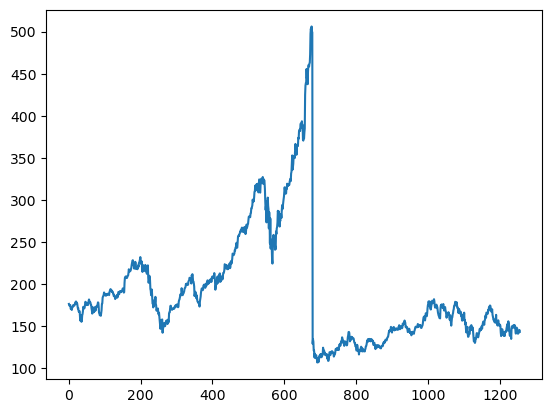

In [14]:
import matplotlib.pyplot as plt
plt.plot(dataset)

In [16]:
import pandas as pd
mydata = pd.read_csv('apple.csv')
mydata.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-12-18 00:00:00+00:00,176.42,177.20,174.86,174.88,28831533,41.937498,42.122915,41.566664,41.571419,115326132,0.0,1.0
1,AAPL,2017-12-19 00:00:00+00:00,174.54,175.39,174.09,175.03,27078872,41.490596,41.692653,41.383624,41.607076,108315488,0.0,1.0
2,AAPL,2017-12-20 00:00:00+00:00,174.35,175.42,173.25,174.87,23000392,41.445430,41.699784,41.183945,41.569041,92001568,0.0,1.0
3,AAPL,2017-12-21 00:00:00+00:00,175.01,176.02,174.10,174.17,20356826,41.602321,41.842412,41.386002,41.402642,81427304,0.0,1.0
4,AAPL,2017-12-22 00:00:00+00:00,175.01,175.42,174.50,174.68,16052615,41.602321,41.699784,41.481087,41.523876,64210460,0.0,1.0


In [18]:
mydata1 = mydata.reset_index()['close']

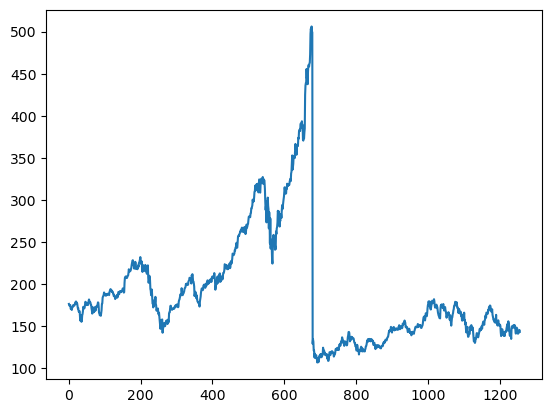

In [19]:
plt.plot(mydata1)

In [20]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(mydata1).reshape(-1,1))

In [21]:
print(df1)

[[0.17427677]
 [0.16956794]
 [0.16909205]
 ...
 [0.09430182]
 [0.09675642]
 [0.0910958 ]]


In [22]:
# split the data into training and test
training_size = int(len(df1)*0.70)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :1]

In [23]:
print(training_size, test_size)

879 378


In [24]:
train_data

array([[1.74276769e-01],
       [1.69567940e-01],
       [1.69092048e-01],
       [1.70745147e-01],
       [1.70745147e-01],
       [1.59624296e-01],
       [1.59699436e-01],
       [1.60901691e-01],
       [1.56268003e-01],
       [1.63857232e-01],
       [1.63782091e-01],
       [1.65785848e-01],
       [1.70720100e-01],
       [1.69092048e-01],
       [1.69041954e-01],
       [1.68941766e-01],
       [1.71421415e-01],
       [1.75954915e-01],
       [1.73700689e-01],
       [1.80989355e-01],
       [1.81390106e-01],
       [1.79386349e-01],
       [1.75729493e-01],
       [1.75829681e-01],
       [1.68766437e-01],
       [1.60976832e-01],
       [1.61978710e-01],
       [1.53087038e-01],
       [1.50607389e-01],
       [1.51759549e-01],
       [1.52636193e-01],
       [1.34402004e-01],
       [1.24358172e-01],
       [1.40738885e-01],
       [1.31997495e-01],
       [1.21001879e-01],
       [1.24157796e-01],
       [1.39937383e-01],
       [1.44020038e-01],
       [1.51609267e-01],


In [25]:
test_data

array([[0.06249217],
       [0.05916093],
       [0.06376957],
       [0.06797746],
       [0.06727614],
       [0.06654978],
       [0.06579837],
       [0.06998121],
       [0.07386349],
       [0.07544145],
       [0.07621791],
       [0.08295554],
       [0.08811522],
       [0.09450219],
       [0.09117095],
       [0.09585473],
       [0.09432686],
       [0.09718222],
       [0.1059737 ],
       [0.10429555],
       [0.09906074],
       [0.08919224],
       [0.09845961],
       [0.09658109],
       [0.10008766],
       [0.10449593],
       [0.10557295],
       [0.10001252],
       [0.09552912],
       [0.09718222],
       [0.09773325],
       [0.09688165],
       [0.10149029],
       [0.10046337],
       [0.10073889],
       [0.09843456],
       [0.09830933],
       [0.09708203],
       [0.09773325],
       [0.10532248],
       [0.10584847],
       [0.11090795],
       [0.10857858],
       [0.0989856 ],
       [0.09983719],
       [0.10356919],
       [0.10737633],
       [0.107

In [ ]:
# Time Series Forecasting basis LSTM mdoel